<a href="https://colab.research.google.com/github/Md819-max/site/blob/main/Binnace_BTC_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

# Download 60-day hourly BTC-USD data
df = yf.download("BTC-USD", interval="1h", period="60d")
df.reset_index(inplace=True)
df = df[["Datetime", "Close"]].rename(columns={"Close": "price"})

# Feature engineering
df["lag_1"] = df["price"].shift(1)
df["lag_2"] = df["price"].shift(2)
df["lag_3"] = df["price"].shift(3)
df["sma_10"] = df["price"].rolling(10).mean()
df["returns"] = df["price"].pct_change()
df["trend"] = (df["price"].shift(-1) > df["price"]).astype(int)
df["target_2day"] = df["price"].shift(-48)
df.dropna(inplace=True)

# Preview
print(df.tail())


/tmp/ipython-input-60-1137878335.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", interval="1h", period="60d")
[*********************100%***********************]  1 of 1 completed

Price                   Datetime          price          lag_1          lag_2  \
Ticker                                  BTC-USD                                 
1376   2025-07-14 08:00:00+00:00  122566.445312  122776.273438  122091.015625   
1377   2025-07-14 09:00:00+00:00  121969.546875  122566.445312  122776.273438   
1378   2025-07-14 10:00:00+00:00  121918.609375  121969.546875  122566.445312   
1379   2025-07-14 11:00:00+00:00  121487.484375  121918.609375  121969.546875   
1380   2025-07-14 12:00:00+00:00  121863.000000  121487.484375  121918.609375   

Price           lag_3         sma_10   returns trend    target_2day  
Ticker                                                               
1376    122454.945312  120909.767969 -0.001709     0  118709.171875  
1377    122091.015625  121196.980469 -0.004870     0  119121.046875  
1378    122776.273438  121476.950781 -0.000418     0  118762.875000  
1379    122566.445312  121712.195312 -0.003536     1  118765.257812  
1380    1219

In [ ]:
import yfinance as yf
import pandas as pd

# Download data
df = yf.download("BTC-USD", interval="1h", period="60d")
df.reset_index(inplace=True)
df = df[["Datetime", "Close"]].rename(columns={"Close": "price"})

# Feature engineering
df["lag_1"] = df["price"].shift(1)
df["lag_2"] = df["price"].shift(2)
df["lag_3"] = df["price"].shift(3)
df["sma_10"] = df["price"].rolling(10).mean()
df["returns"] = df["price"].pct_change()
df["trend"] = (df["price"].shift(-1) > df["price"]).astype(int)
df["target_2day"] = df["price"].shift(-48)
df.dropna(inplace=True)


/tmp/ipython-input-61-4233472308.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", interval="1h", period="60d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

# ✅ Features and targets
features = ["price", "lag_1", "lag_2", "lag_3", "sma_10"]
X_cls = df[features]
y_cls = df["trend"]
X_reg = df[features]
y_reg = df["target_2day"]

# ✅ Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# ✅ Scale
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# ✅ Train models
log_model = LogisticRegression().fit(X_train_cls_scaled, y_train_cls)
tree_model = DecisionTreeClassifier().fit(X_train_cls_scaled, y_train_cls)
knn_model = KNeighborsClassifier().fit(X_train_cls_scaled, y_train_cls)
rf_model = RandomForestRegressor().fit(X_train_reg_scaled, y_train_reg)
kmeans_model = KMeans(n_clusters=2, random_state=42).fit(X_train_cls_scaled)

# ✅ Evaluate
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test_cls, log_model.predict(X_test_cls_scaled)))
print("🌳 Decision Tree Accuracy:", accuracy_score(y_test_cls, tree_model.predict(X_test_cls_scaled)))
print("👥 KNN Accuracy:", accuracy_score(y_test_cls, knn_model.predict(X_test_cls_scaled)))
print("🎯 Random Forest MAE (2-day price prediction):", mean_absolute_error(y_test_reg, rf_model.predict(X_test_reg_scaled)))
print("🧠 KMeans cluster centers:", kmeans_model.cluster_centers_)


🔍 Logistic Regression Accuracy: 0.48727272727272725
🌳 Decision Tree Accuracy: 0.4909090909090909
👥 KNN Accuracy: 0.4581818181818182
🎯 Random Forest MAE (2-day price prediction): 1747.4458292613633
🧠 KMeans cluster centers: [[-0.203416   -0.20321582 -0.20310474 -0.20248731 -0.20234777]
 [ 2.93950447  2.93661168  2.93500646  2.92608426  2.92406781]]


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

# Build model
dl_reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and train
dl_reg_model.compile(optimizer='adam', loss='mean_absolute_error')
dl_reg_model.fit(X_train_reg_scaled, y_train_reg, epochs=100, verbose=0)

# Predict and evaluate
dl_reg_pred = dl_reg_model.predict(X_test_reg_scaled).flatten()
dl_reg_mae = mean_absolute_error(y_test_reg, dl_reg_pred)
print(f"📉 Deep Learning Regression MAE: ${dl_reg_mae:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
📉 Deep Learning Regression MAE: $19767.19


In [ ]:
from sklearn.metrics import accuracy_score

# Build model
dl_cls_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cls_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
dl_cls_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_cls_model.fit(X_train_cls_scaled, y_train_cls, epochs=100, verbose=0)

# Predict and evaluate
dl_cls_probs = dl_cls_model.predict(X_test_cls_scaled).flatten()
dl_cls_pred = (dl_cls_probs > 0.5).astype(int)
dl_cls_acc = accuracy_score(y_test_cls, dl_cls_pred)
print(f"📈 Deep Learning Classification Accuracy: {dl_cls_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
📈 Deep Learning Classification Accuracy: 0.48


In [ ]:
# Select the latest known data row (must be run after feature engineering)
latest_features = df[["price", "lag_1", "lag_2", "lag_3", "sma_10"]].iloc[-1:].copy()
predictions_rf = []
predictions_dl = []
dates = pd.date_range(start="2025-07-16", periods=3)

# Function to simulate next input row using last prediction
def shift_inputs(prev_row, new_price):
    new_row = prev_row.copy()
    new_row["lag_3"] = new_row["lag_2"].values[0]
    new_row["lag_2"] = new_row["lag_1"].values[0]
    new_row["lag_1"] = new_row["price"].values[0]
    new_row["price"] = new_price
    new_row["sma_10"] = (df["price"].iloc[-9:].sum() + new_price) / 10
    return new_row


In [ ]:
current_input = latest_features.copy()

for i in range(3):
    scaled_input = scaler.transform(current_input)

    # Predict with Random Forest and DL
    rf_price = rf_model.predict(scaled_input)[0]
    dl_price = dl_reg_model.predict(scaled_input).flatten()[0]

    predictions_rf.append(rf_price)
    predictions_dl.append(dl_price)

    # Shift input for next day using RF result
    current_input = shift_inputs(current_input, rf_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


        Date  RandomForest_Price  DeepLearning_Price
0 2025-07-16       118828.941094         289779.9375
1 2025-07-17       117430.142031                 NaN
2 2025-07-18       118725.349922                 NaN


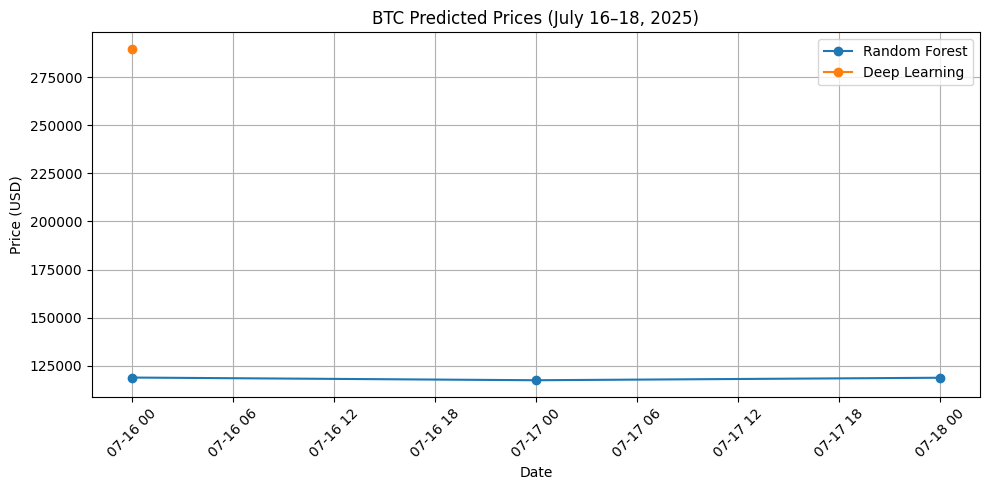

In [ ]:
pred_df = pd.DataFrame({
    "Date": dates,
    "RandomForest_Price": predictions_rf,
    "DeepLearning_Price": predictions_dl
})

print(pred_df)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(pred_df["Date"], pred_df["RandomForest_Price"], label="Random Forest", marker="o")
plt.plot(pred_df["Date"], pred_df["DeepLearning_Price"], label="Deep Learning", marker="o")
plt.title("BTC Predicted Prices (July 16–18, 2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
current_input = latest_features.copy()

for i in range(3):
    scaled_input = scaler.transform(current_input)

    rf_price = rf_model.predict(scaled_input)[0]
    dl_price = dl_reg_model.predict(scaled_input).flatten()[0]

    predictions_rf.append(rf_price)
    predictions_dl.append(dl_price)

    current_input = shift_inputs(current_input, rf_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
